# Lecture

## Importing packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
print("Using " + np.__name__ + " version " + np.__version__)
print("Using " + cv2.__name__ + " version " + cv2.__version__)

Using numpy version 1.23.5
Using cv2 version 4.8.0


In [3]:
PATH = "../img/"
LENA = os.path.join(PATH, "lena.png")

# Create and add noise

## Adding noise to an image

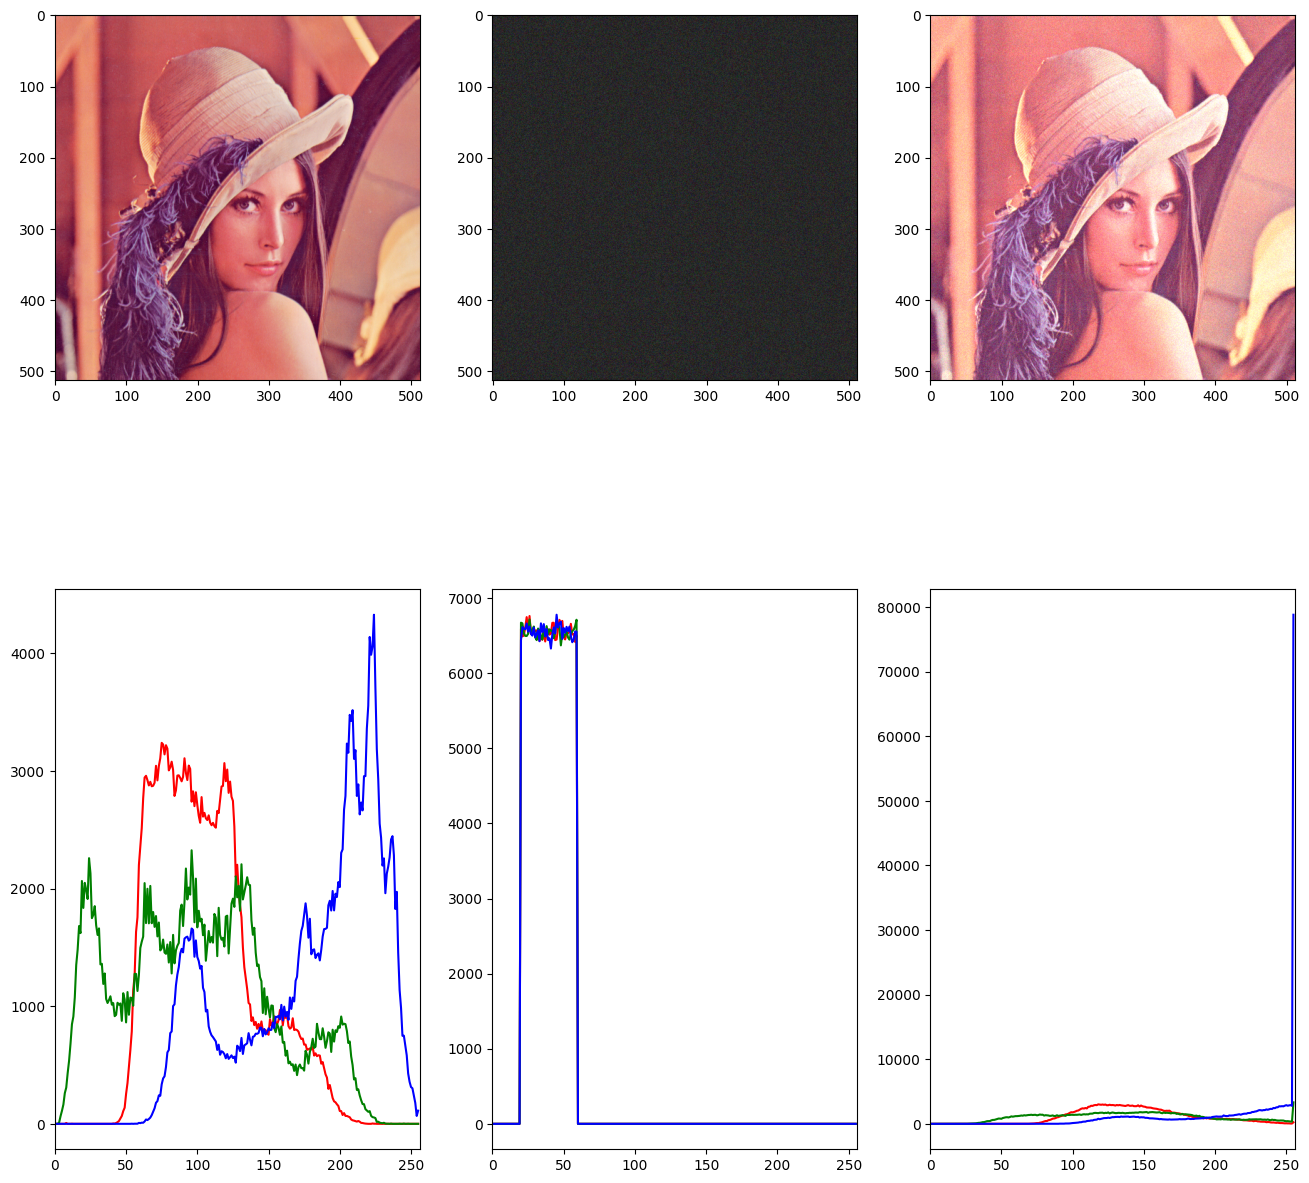

In [7]:
img = cv2.imread(LENA, cv2.IMREAD_COLOR)
noise = create_noisy_img(img.shape, noise_type='uniform', a=20, b = 60)
img2 = cv2.add(img, noise)

# Plot results
fig, ax = plt.subplots(2,3)
fig.set_size_inches(16,16)

ax[0,0].imshow(bgr2rgb(img))
ax[0,1].imshow(bgr2rgb(noise))
ax[0,2].imshow(bgr2rgb(img2))

plot_histogram(img, ax[1,0])
plot_histogram(noise, ax[1,1])
plot_histogram(img2, ax[1,2])
plt.show()



Noise (min, max) = -91.15, 95.78
Img2 (min, max) = -64.73, 322.57
Img2 (min, max) = 0.00, 255.00


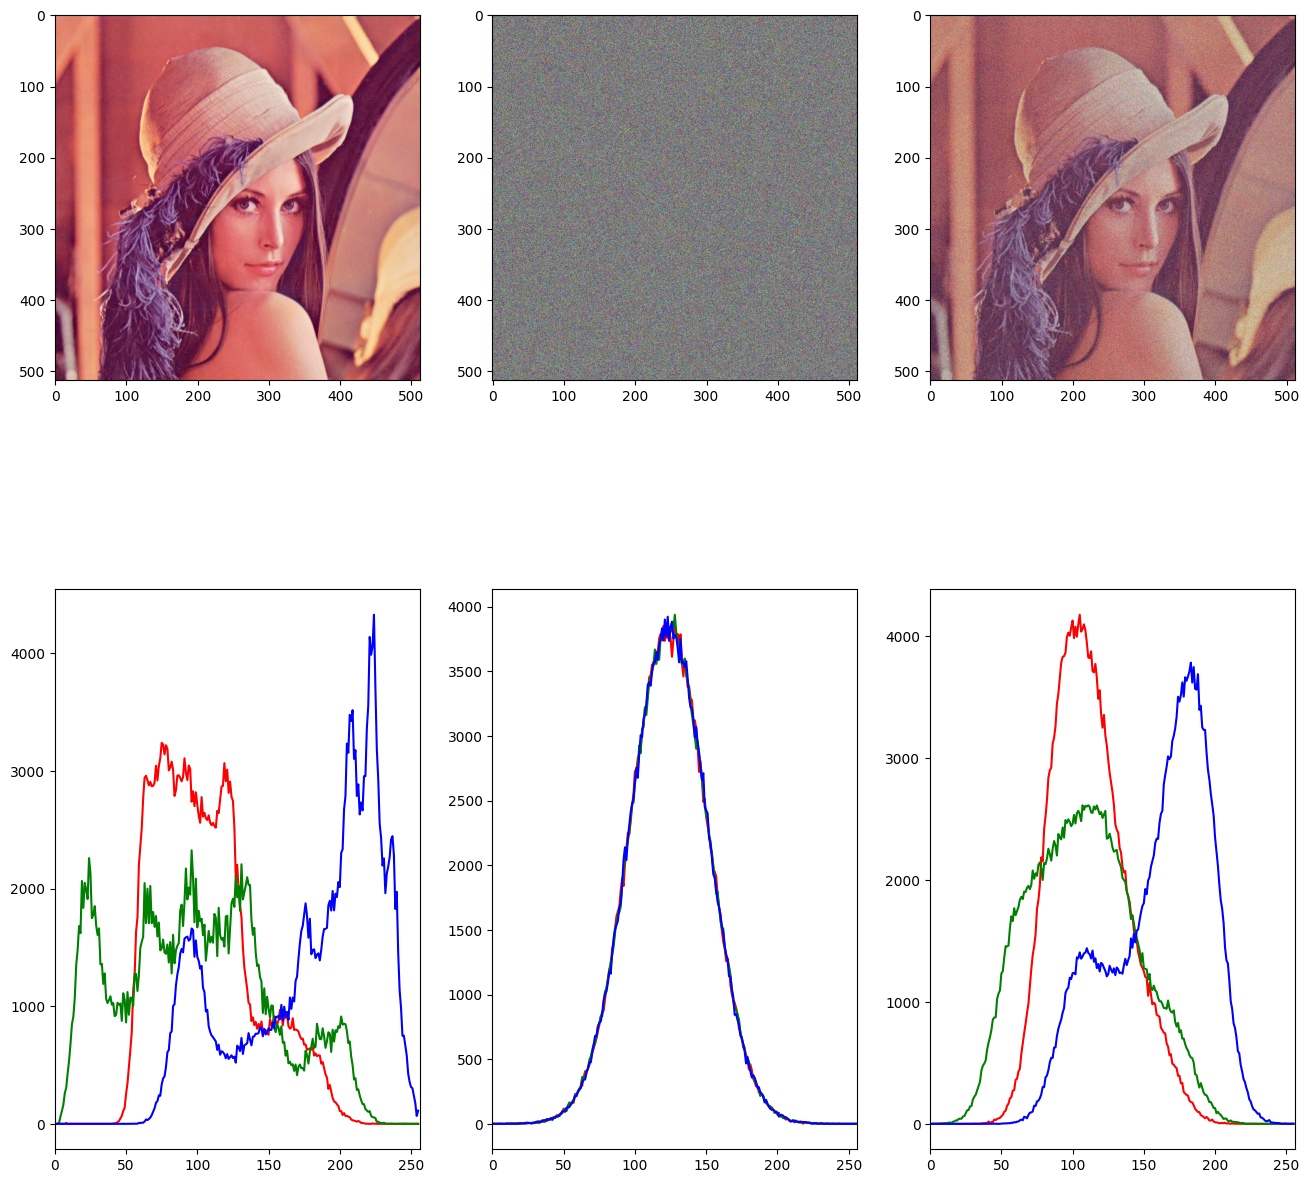

In [52]:
img = cv2.imread(LENA, cv2.IMREAD_COLOR)

mu, std = 0, 20
noise = mu + std*np.random.normal(0, 1, img.shape)
print(f'Noise (min, max) = {noise.min():.2f}, {noise.max():.2f}')

img2 = cv2.add(img.astype('float'), noise)
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')

img2 = np.uint8(255*normalize_img(img2))
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')


# Plot results

# # Scale noise image for visualization purposes:
noise = np.uint8(255*normalize_img(noise))

fig, ax = plt.subplots(2,3)
fig.set_size_inches(16,16)

ax[0,0].imshow(bgr2rgb(img))
ax[0,1].imshow(bgr2rgb(noise))
ax[0,2].imshow(bgr2rgb(img2))

plot_histogram(img, ax[1,0])
plot_histogram(noise, ax[1,1])
plot_histogram(img2, ax[1,2])
plt.show()

Noise (min, max) = 24.21, 216.62
Img2 (min, max) = 53.28, 452.46
Img2 (min, max) = 0.00, 255.00


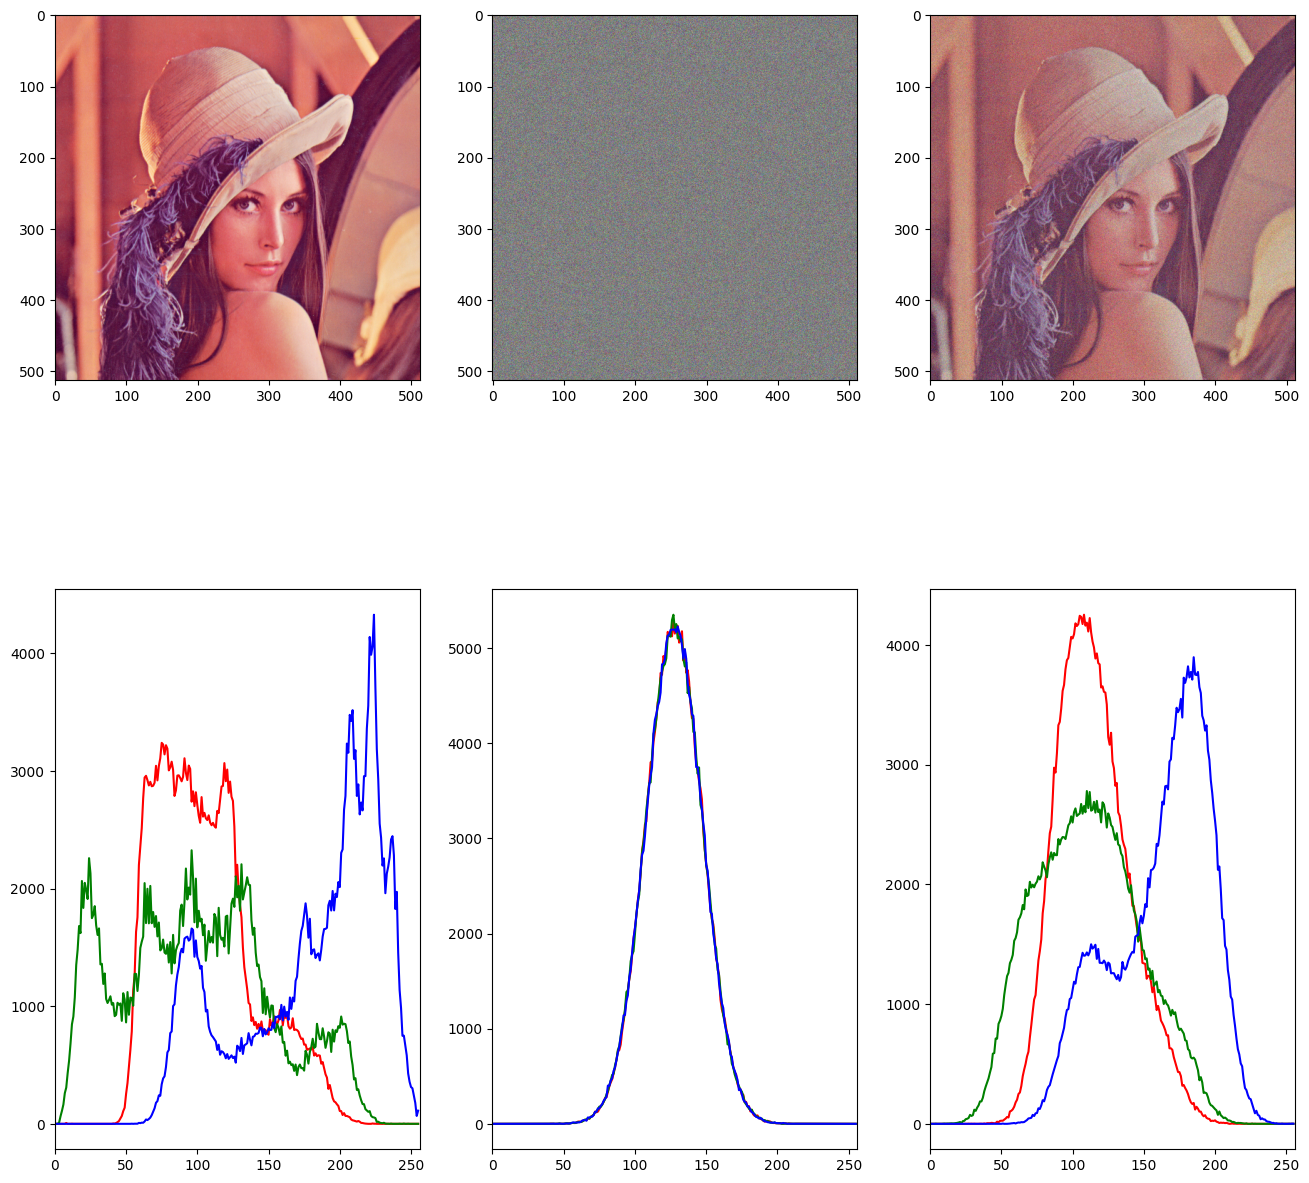

In [56]:
img = cv2.imread(LENA, cv2.IMREAD_COLOR)

noise = np.random.normal(128, 20, img.shape)
print(f'Noise (min, max) = {noise.min():.2f}, {noise.max():.2f}')

img2 = cv2.add(img.astype('float'), noise)
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')

img2 = np.uint8(255*normalize_img(img2))
print(f'Img2 (min, max) = {img2.min():.2f}, {img2.max():.2f}')


# Plot results

# # Scale noise image for visualization purposes:
# noise = np.uint8(255*normalize_img(noise))
noise = np.uint8(noise)

fig, ax = plt.subplots(2,3)
fig.set_size_inches(16,16)

ax[0,0].imshow(bgr2rgb(img))
ax[0,1].imshow(bgr2rgb(noise))
ax[0,2].imshow(bgr2rgb(img2))

plot_histogram(img, ax[1,0])
plot_histogram(noise, ax[1,1])
plot_histogram(img2, ax[1,2])
plt.show()

## Adding salt & pepper noise to an image

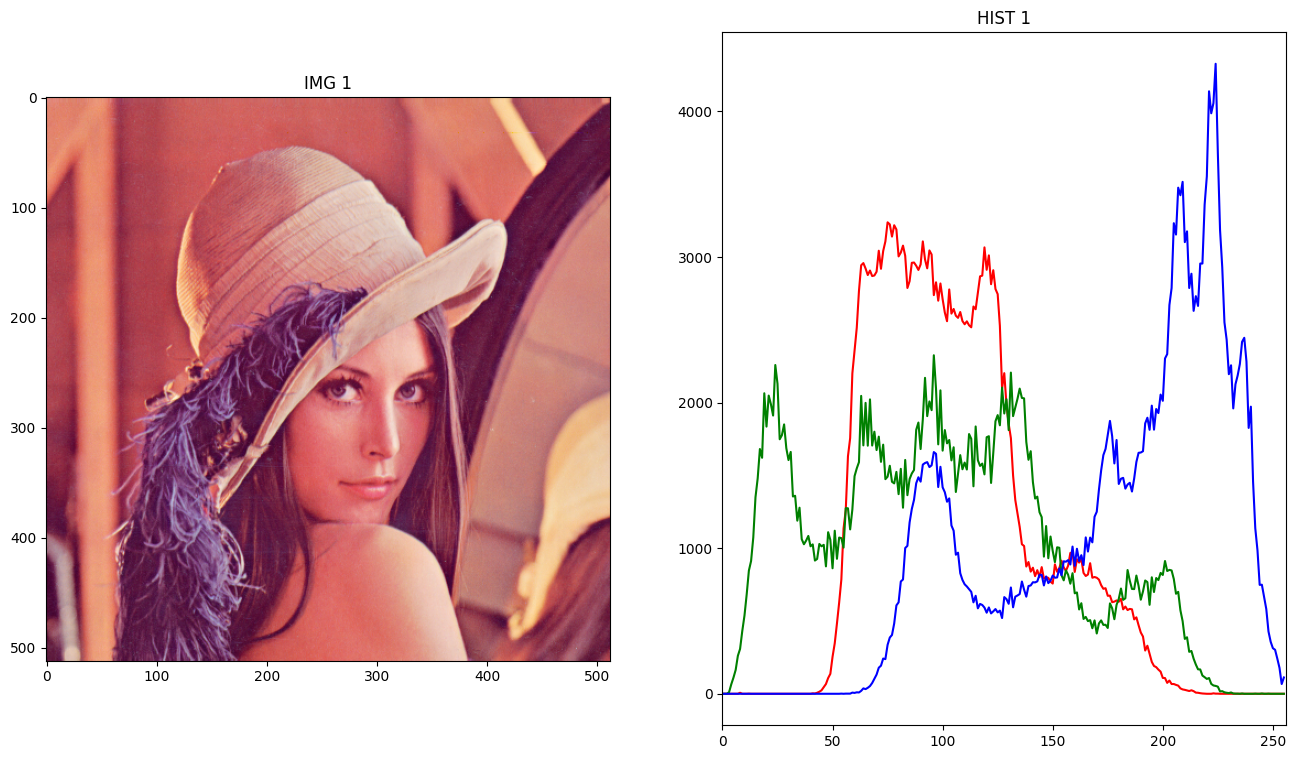

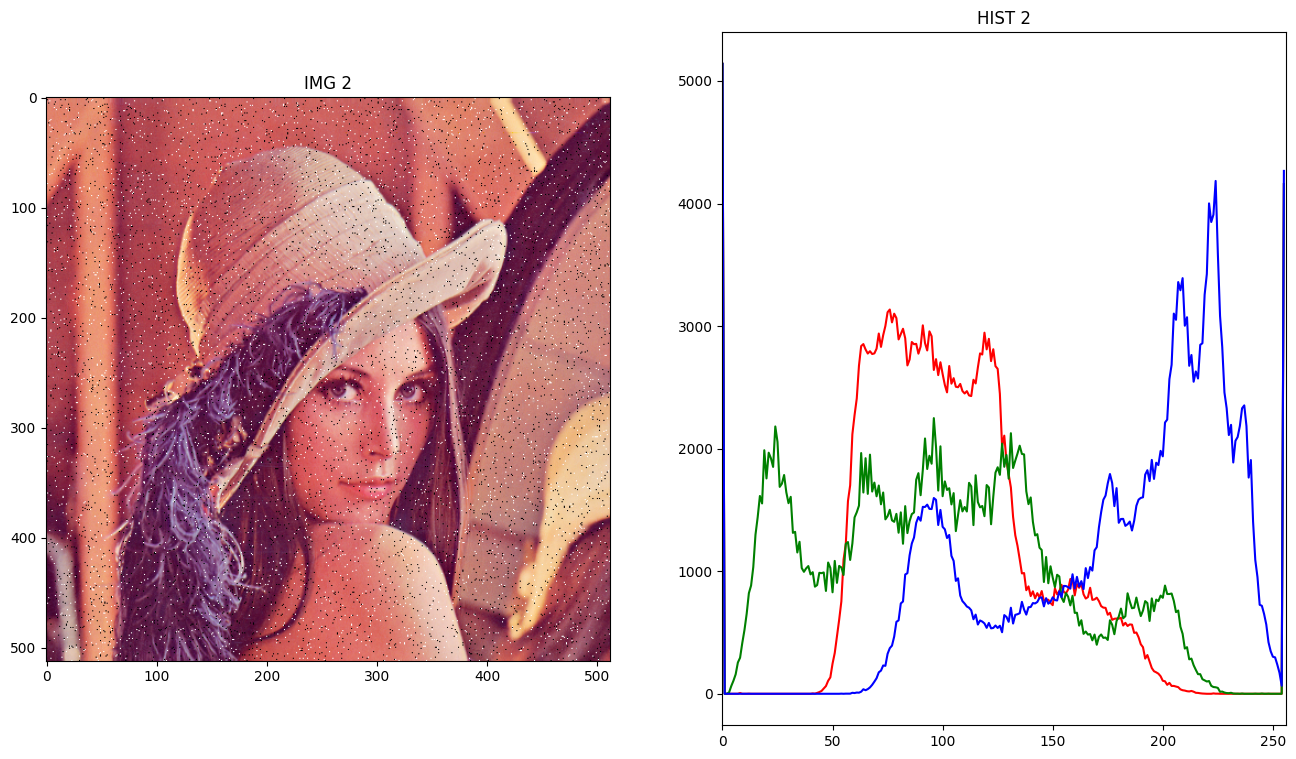

In [60]:
img = cv2.imread(LENA, cv2.IMREAD_COLOR)

noise = np.zeros((img.shape[0], img.shape[1]), img.dtype)
cv2.randu(noise, 0, 255)
salt = noise > 250
pepper = noise < 5
img2 = img.copy()
img2[salt == True] = np.array([255, 255, 255])
img2[pepper == True] = np.array([0, 0, 0])

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 1');   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 1');  plot_histogram(img)
plt.show()

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 2');   plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 2');  plot_histogram(img2)
plt.show()

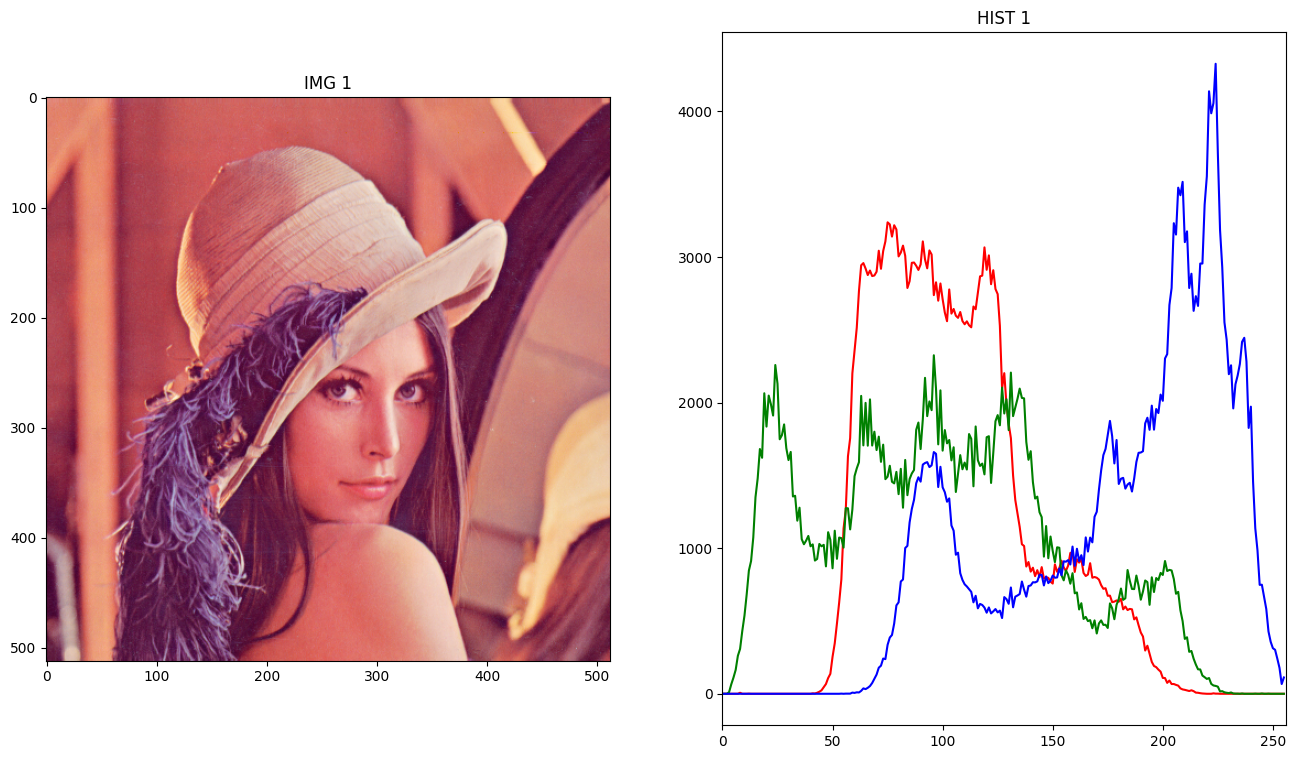

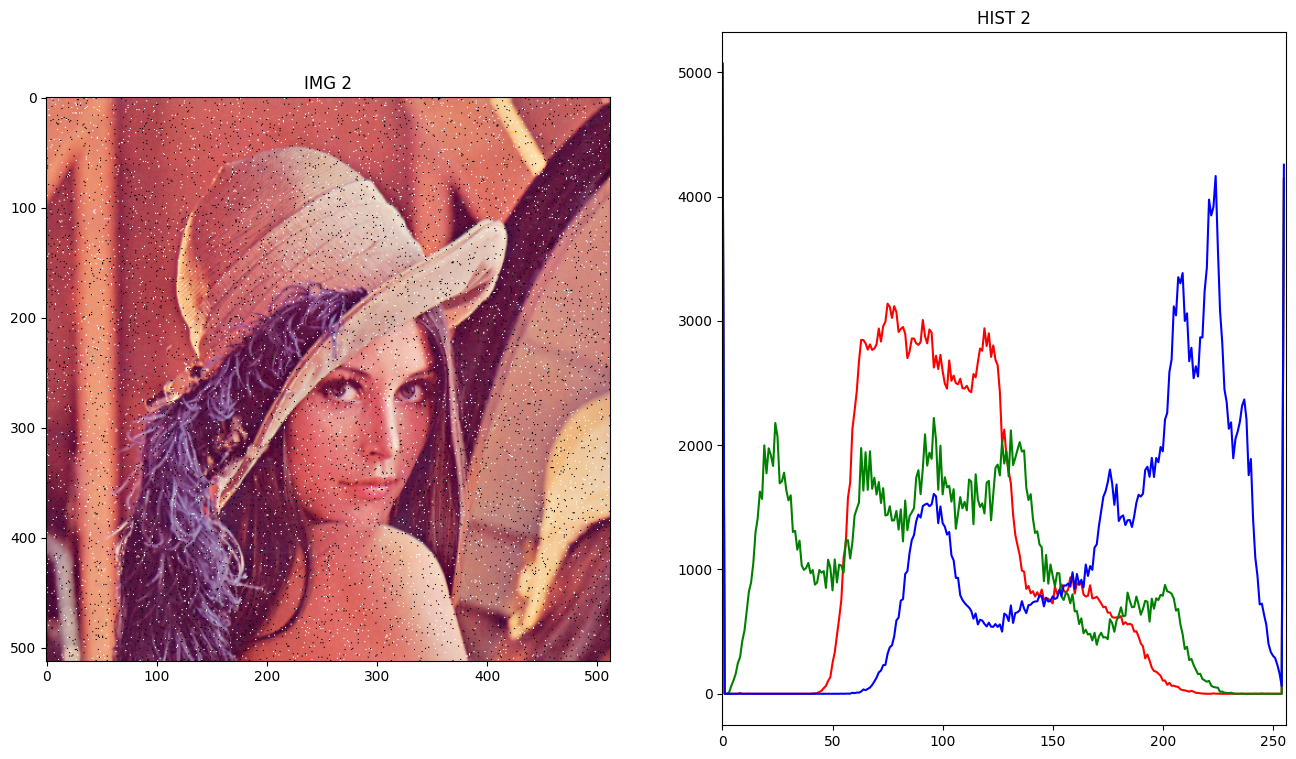

In [73]:
img = cv2.imread(LENA, cv2.IMREAD_COLOR)

noise = np.random.uniform(0,255, (img.shape[0], img.shape[1]))
noise = np.uint8(noise)
noise

salt = noise > 250
pepper = noise < 5

img2 = img.copy()
img2[salt] = np.array([255, 255, 255])
img2[pepper] = np.array([0, 0, 0])

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 1');   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 1');  plot_histogram(img)
plt.show()

plt.figure(figsize=(16,9))
plt.subplot(121); plt.title('IMG 2');   plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('HIST 2');  plot_histogram(img2)
plt.show()